## Importar librerías necesarias

In [2]:
from netCDF4 import Dataset              # Read / Write NetCDF4 files
import matplotlib.pyplot as plt          # Plotting library
from datetime import datetime            # Basic Dates and time types
import cartopy, cartopy.crs as ccrs      # Plot maps
import os                                # Miscellaneous operating system interfaces
from utilities import geo2grid, convertExtent2GOESProjection      # Our own utilities

## Leemos los datos GOES-R

In [3]:
file = Dataset('data/OR_ABI-L2-CMIPF-M6C13_G16_s20223041800203_e20223041809522_c20223041810015.nc') # Este

## Declaramos un área que queremos visualizar

In [4]:
# Desired extent
extent = [-85.0, -20.0, -65.0, 2.0] # Min lon, Min lat lon, Max lon, Max lat

## Convertir lat/lon a coordenadas de cuadrícula

Vamos a convertir las coordenadas en proyecciones geográficas a estacionarias y recuperar la ubicación de las filas y columnas.

In [5]:
lly, llx = geo2grid(extent[1], extent[0], file)
ury, urx = geo2grid(extent[3], extent[2], file)

print(lly, llx)
print(ury, urx)

3777 2199
2601 3262


## Ahora vamos recortar la matriz total para el área seleccionada

In [9]:
# Get the pixel values
data = file.variables['CMI'][ury:lly, llx:urx]
data

masked_array(
  data=[[286.7008 , 286.63934, 287.00806, ..., 261.6893 , 263.71725,
         262.11948],
        [286.7008 , 286.63934, 286.88516, ..., 258.24792, 259.1697 ,
         255.1138 ],
        [286.57788, 286.63934, 286.63934, ..., 255.48251, 252.84003,
         250.62772],
        ...,
        [287.4997 , 287.13098, 287.1924 , ..., 272.68945, 272.38217,
         272.01346],
        [287.80695, 287.31534, 286.88516, ..., 272.68945, 272.68945,
         272.628  ],
        [286.88516, 286.455  , 286.3321 , ..., 272.5051 , 272.81235,
         273.11963]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

## Convertir lat/lon a coordenadas de cuadrícula

In [11]:
img_extent = convertExtent2GOESProjection(extent)
print(img_extent)

(-1025460.8038858362, 1103405.0014828376, -2136852.7718435447, 220481.33084696418)


## Recuperamos los parámetros geográficos

In [12]:
longitude_of_projection_origin = file.variables['goes_imager_projection'].longitude_of_projection_origin
perspective_point_height = file.variables['goes_imager_projection'].perspective_point_height

print(longitude_of_projection_origin)
print(perspective_point_height)

-75.0
35786023.0


## Finalmente hacemos nuestra figura

Text(0.0, 1.0, 'GOES-16 Band 13 2022-10-31 18:00 UTC')

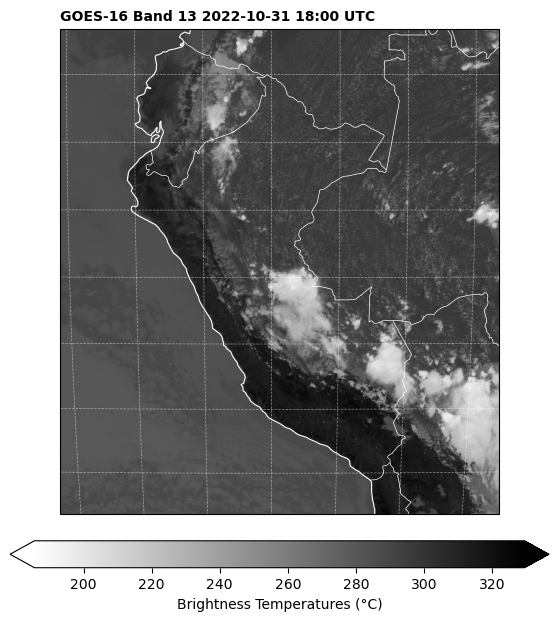

In [21]:
# Elijamos el tamaño de la figura (ancho x alto, en pulgadas)
plt.figure(figsize=(7,7))
 
# Usamos la proyección geoestacionaria en cartopy
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=longitude_of_projection_origin, satellite_height=perspective_point_height))
 
# Agregar líneas de costa, bordes y líneas de cuadrícula
ax.coastlines(color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)

# Define the color scale based on the channel
colormap = "gray_r" # White to black for IR channels

# Agregamos la matriz de datos
img = ax.imshow(data, origin='upper', extent=img_extent, cmap=colormap)

#img = ax.imshow(data, vmin=-80, vmax=40, origin='upper', extent=img_extent, cmap='Greys')

# Agregamos la barra de colores
plt.colorbar(img, label='Brightness Temperatures (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# Extraemos la fecha
date = (datetime.strptime(file.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ'))

# Agregamos el titulo
plt.title('GOES-16 Band 13 ' + date.strftime('%Y-%m-%d %H:%M') + ' UTC', fontweight='bold', fontsize=10, loc='left')


### ¿Cuál es la proyección de la figura?